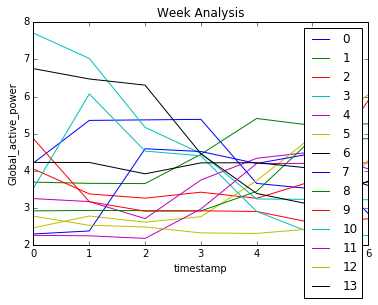

In [1]:
import csv
import matplotlib.pylab as plt
%matplotlib inline


def showWeekly(x_axis,y_axis,y_range,start):

    weekDiffer = 518400
    nextWeek = start + weekDiffer
    labels = []


    with open('./Datasets/household_power_consumption.csv', 'r') as csvFile:
         reader = csv.reader(csvFile)
         header=next(reader)


         for i in range(len(header)):
                 if (header[i] == x_axis):
                     j=i
                 if (header[i] == y_axis):
                     k=i

         x = [0,1,2,3,4,5,6]
         y=[[]]

         for i in range(y_range):
                 y.append([])

        # i is here for keep tracking the week
         i=0
         for row in reader:

                if (int(row[j]) <= nextWeek):
                      y[i].append(row[k])
                if (int(row[j]) > nextWeek):
                        i = i + 1
                        y[i].append(row[k])
                        nextWeek = int(row[j]) + weekDiffer

    for i in range(len(y)):
        labels.append(i)

    for y_arr, label in zip(y, labels):
        plt.plot(x, y_arr, label=label)

    plt.title('Week Analysis')
    plt.ylabel(y_axis)
    plt.xlabel(x_axis)
    plt.legend()
    plt.show()


with open('./Datasets/household_power_consumption.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    header = next(reader)

    row_count = sum(1 for row in reader)
    y_range = int((row_count / 7) - 1)

start = 1164997800
# show weekly analysis graph timestamp vs gloabal active power
showWeekly("timestamp","Global_active_power",y_range,start)
